###**Context:**
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

###**Problem Statement:**<br>
Classify the water quality whether it is potable or not based on the features provided.

###**Feature Details:**<br>
**pH value:** PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

**Hardness:** Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

**Solids (Total dissolved solids - TDS):** Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

**Chloramines:** Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

**Sulfate:** Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

**Conductivity:** Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

**Organic_carbon:** Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

**Trihalomethanes:** THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

**Turbidity:** The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

**Potability:** Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [1]:
import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm_notebook

#Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})

In [2]:
df= pd.read_csv("water_potability.csv")

### Exploratory Data Analysis

In [3]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Except Target feature, other features are float and continueous value. we can convert the Portability into Categoring feature

In [5]:
df['Potability']=df['Potability'].astype('category')

In [6]:
#create approve limit for each features based on data available in Google search
cols=df.columns[0:9].to_list()
min_val=[6.52,0,500,0,3,0,0,0,0]
max_val=[6.83,0,1000,4,250,400,2,80,5]
limit=pd.DataFrame(data=[min_val, max_val], columns=cols)

In [7]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

From the above table, we can see that the count of each feature are not same. so there must me some null values.
Feature Solids has the high mean and standard deviation comparted to other feature. so the distribution must be high.
However, the above description is for overall population. lets try the same for 2 samples based on Portability feature

In [8]:
#Portability is 1 - means good for Human
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

In [9]:
# Portability is 0 - means not good for Human
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

Mean and std of almost all features are similar for both samples. there are few differnces in Solids feature. Further analysis using hypothetical testing could help us to identify the significance.

In [10]:
#Check for missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Since the missing values are on both classess (Potability 1 & 0), we can replace it with population mean. so, we will replace the Nan values bases on sample mean from both classes.

In [11]:
#Replace null values based on the group/sample mean
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

<Axes: xlabel='Potability', ylabel='count'>

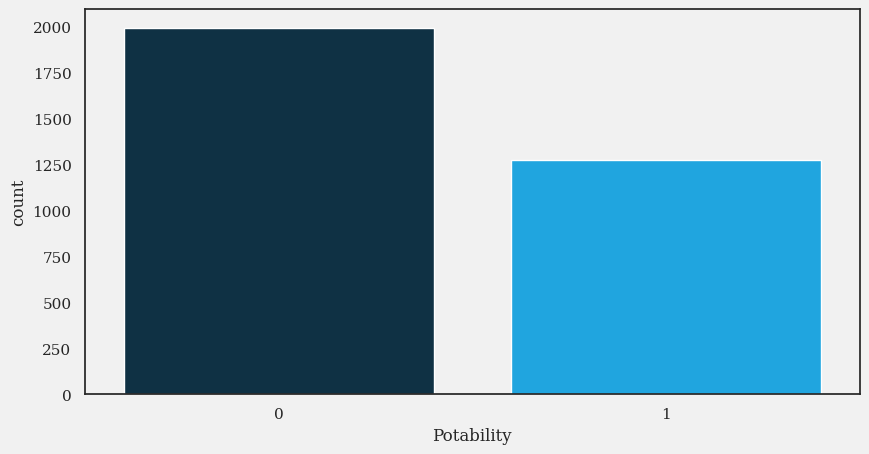

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Potability", data= df, palette = colors)

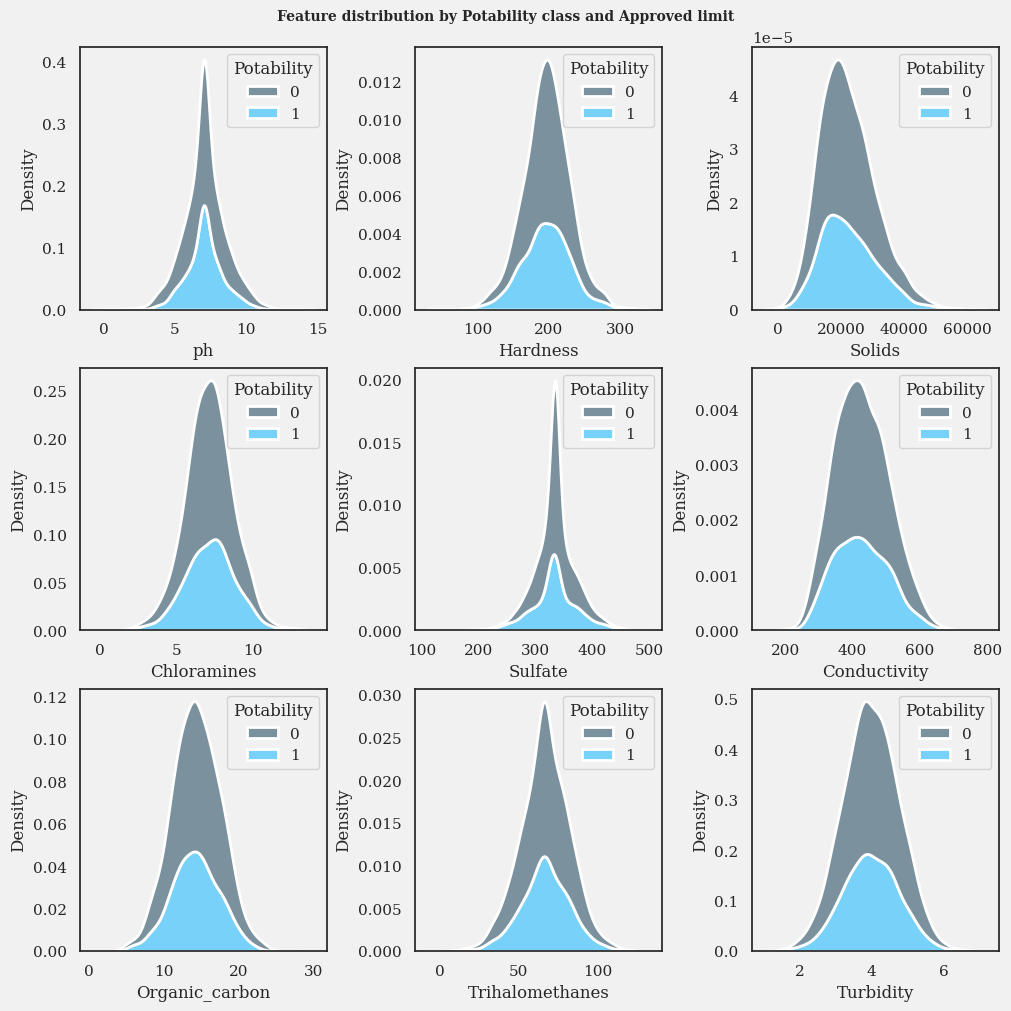

In [13]:
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(10,10), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=10, weight='bold')
ax=ax.flatten()
for x, i in enumerate(cols):
    sns.kdeplot(data=df, x=i, hue='Potability', ax=ax[x], fill=True, multiple='stack', alpha=0.5, linewidth=2)

Based on the approved limit, we can clearly see the difference in the water classification. Ex: distribution of non potable water is high on conductivity compared to potable water. same applicable to Turbidity, Trihalomethanes.
But, Ph value, Chloramines, Sulfate, Organic carbon presence doesn't show significant difference.

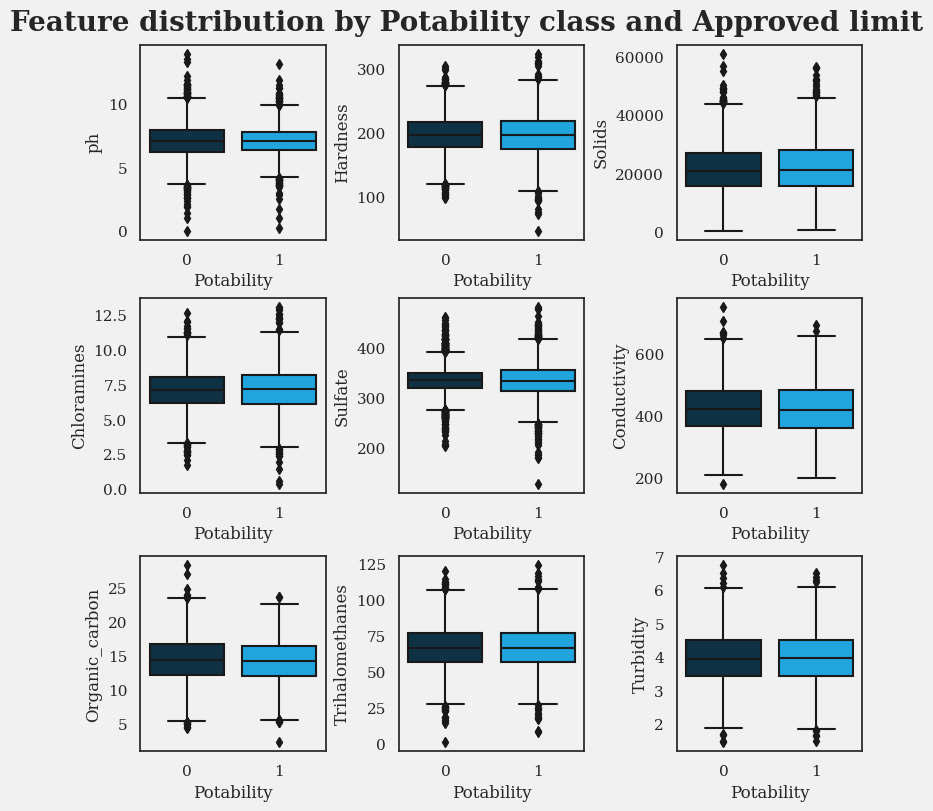

In [14]:
#Box plot
def boxPlotter(dataset, columnName):
    sns.catplot(x="Potability", y = columnName, data = df, kind="box");

fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(8,8), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(cols):
    sns.boxplot(data=df, y=i, x='Potability', ax=ax[x])

There are outliers in the dataset, we need to handle the same. most feature means are looks similar and there are very less differnce in variance. as mentioned in the above observation, Hypothesis testing would be the right option to identify the singnificance.

**Hypothesis testing**<br>
Ho (Null Hypothesis) - Mean for both samples/group are same<br>
H1 (Alternate Hypothesis) - Mean for both samples/group significantly different.<br>
Significant level - 90%<br>
Alpha - 0.5% (ie., 0.1)

p_value for ph is 0.8257362194511633 we accept the null hypothesis
p_value for Hardness is 0.42854158740864634 we accept the null hypothesis
p_value for Solids is 0.053463638184504905 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Chloramines is 0.17361022465074658 we accept the null hypothesis
p_value for Sulfate is 0.12292453703923875 we accept the null hypothesis
p_value for Conductivity is 0.6418845485973537 we accept the null hypothesis
p_value for Organic_carbon is 0.08599746163873828 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Trihalomethanes is 0.675988889793878 we accept the null hypothesis
p_value for Turbidity is 0.9279391620838058 we accept the null hypothesis


Text(6, 0.12, 'Significance level: 0.1')

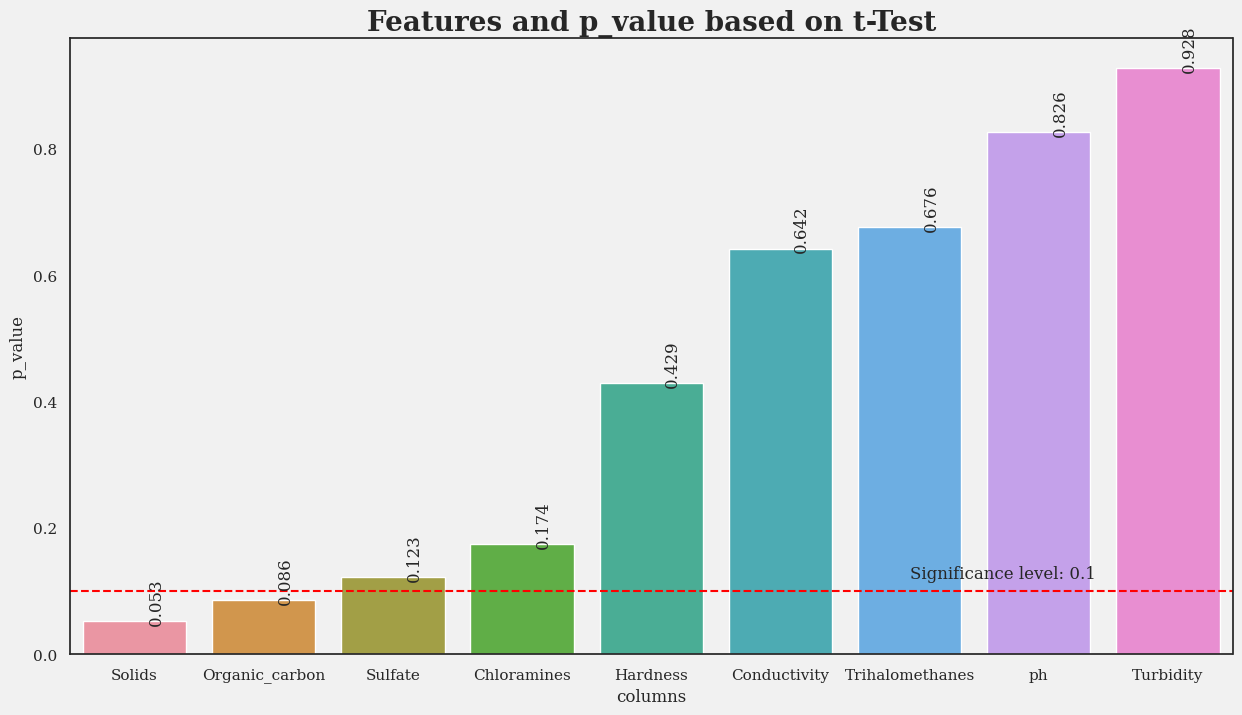

In [15]:
from scipy.stats import ttest_ind
p_val=[]
for i in cols:
    pota_1 = df[df['Potability']==1][i]
    pota_0 = df[df['Potability']==0][i]
    stat, p_value=ttest_ind(pota_1, pota_0)
    p_val.append(np.round(p_value,3))
    if p_value <0.1:
        print(f"p_value for {i} is {p_value} is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis")
    else:
        print(f"p_value for {i} is {p_value} we accept the null hypothesis")

stats_test=pd.DataFrame(columns=['columns','p_value'])
stats_test['columns']= cols
stats_test['p_value']=p_val
stats_test.sort_values(by=['p_value'], ascending=True, inplace=True)

fig=plt.figure(figsize=(15,8))
ax=sns.barplot(data=stats_test, x='columns',y='p_value')
plt.title("Features and p_value based on t-Test", size=20, weight='bold')
for i in ax.patches:
    ax.text(x=i.get_x()+0.5, y=i.get_height(), s=i.get_height(), rotation=90)
ax.axhline(y=0.1, color='red', ls='--')
ax.text(x=6, y=0.12, s="Significance level: 0.1")

From the above Hypothesis testing, we can see that the features solid & Organic_carbon have significant difference in potable & non-potable water. other features shares similarities between two classes

<Axes: >

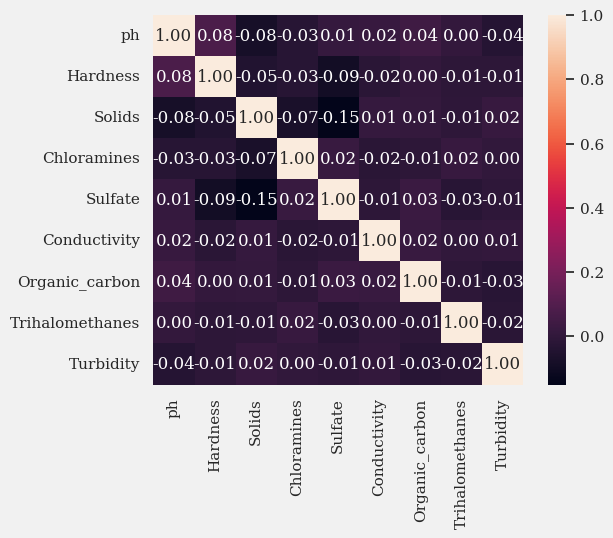

In [16]:
#Heatmap for correlation
sns.heatmap(df.corr(), annot=True, fmt='0.2f', square=True)

<Figure size 1500x1500 with 0 Axes>

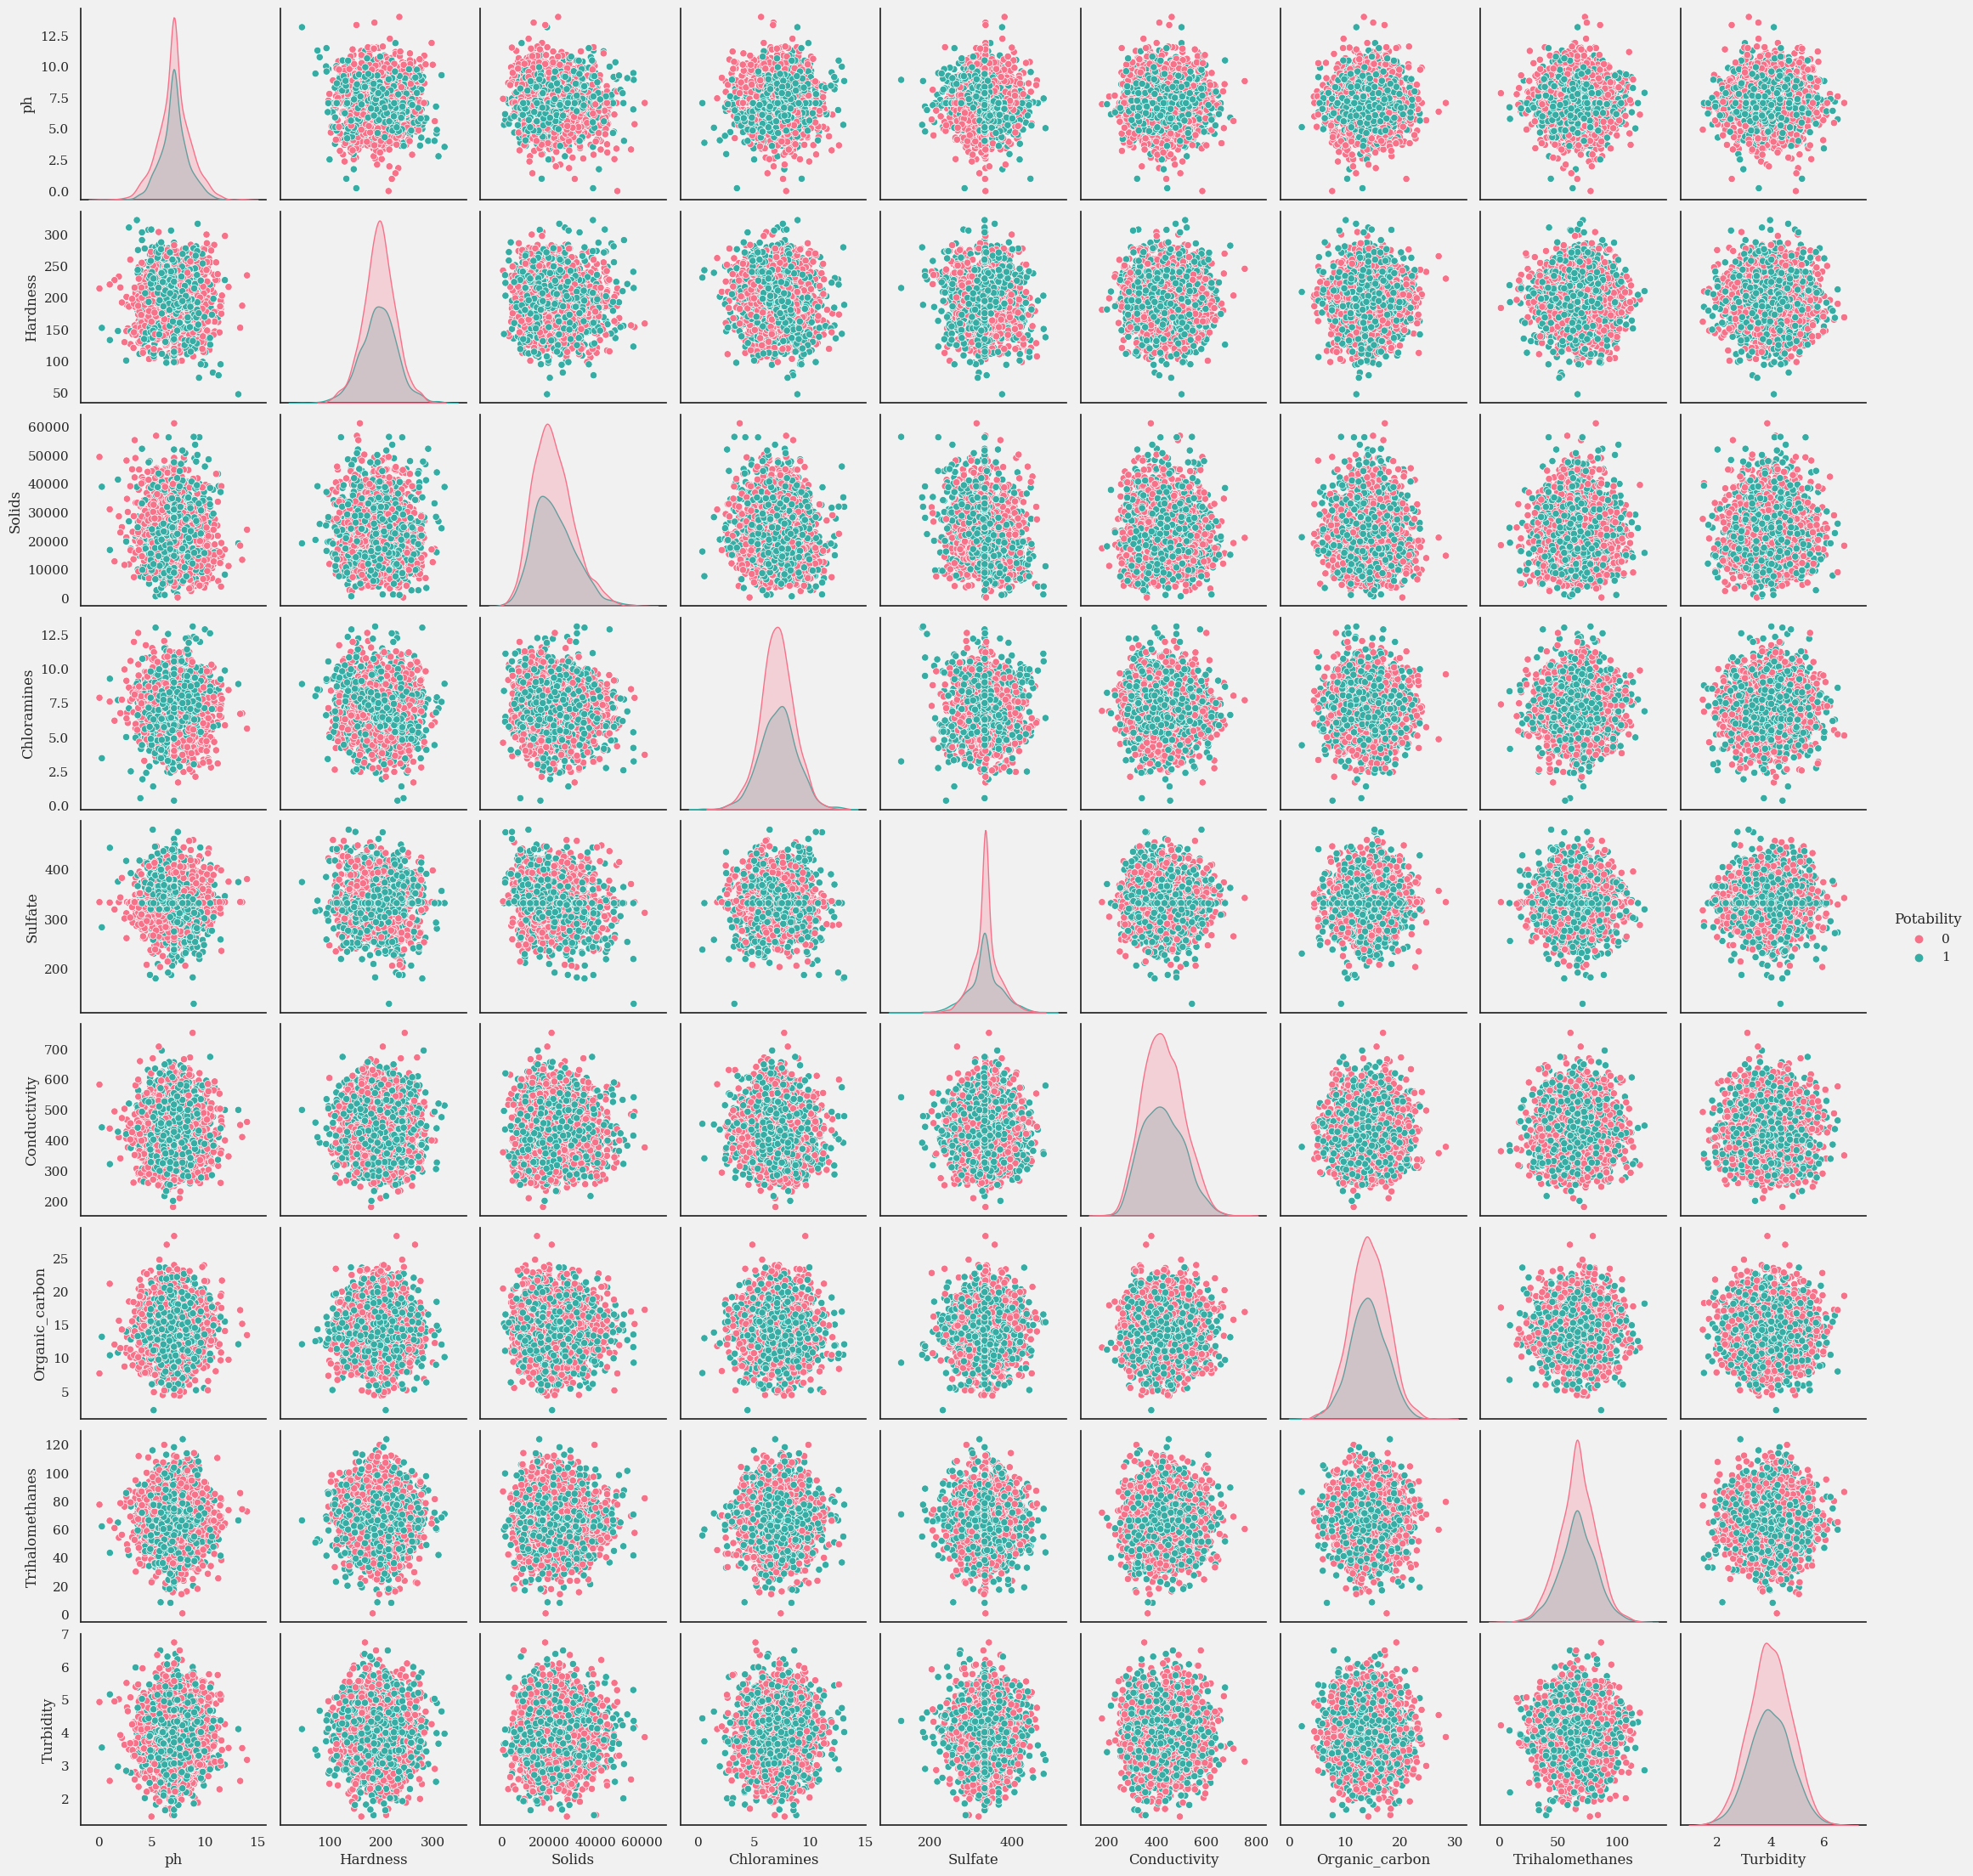

In [17]:
#Pairplot
fig=plt.figure(figsize=(15,15))
sns.pairplot(df, hue="Potability", palette="husl")

From above charts we can confirm<br>

Both Co-relation matrix & Pairplot says that there is no linear relationship between the features that can explan the target variable. So, Linear model may not work on this problem. we need to try with probability based models.



###Preprcoessing

**PCA to check the explained variance**

<Axes: >

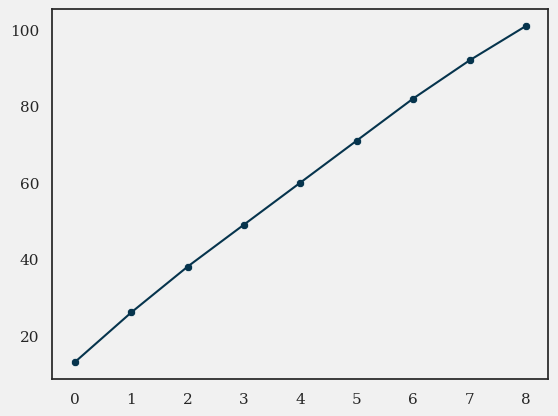

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.drop(['Potability'], axis=1)
y=df['Potability']

scale = StandardScaler()
X_scaled = scale.fit_transform(X)
decom = PCA(svd_solver='auto') #let try with auto rather than defining the components
decom.fit(X_scaled)
ex_var=np.cumsum(np.round(decom.explained_variance_ratio_,2))*100
sns.lineplot(y=ex_var, x=np.arange(0,len(ex_var)))
sns.scatterplot(y=ex_var, x=np.arange(0,len(ex_var)))

As mentioned above, all the feature are independent and doesn't share any linear relationship. we would need atleast 7 dimensions to explain 90% of the variations. so dimenstionality reduction doesn't make any change.



**Skewness**

In [19]:
skew_val = df.skew().sort_values(ascending=False)
skew_val

<ipython-input-19-aa17e3a25069>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew_val = df.skew().sort_values(ascending=False)


Solids             0.621634
Conductivity       0.264490
ph                 0.027672
Organic_carbon     0.025533
Turbidity         -0.007817
Chloramines       -0.012098
Hardness          -0.039342
Sulfate           -0.041952
Trihalomethanes   -0.085042
dtype: float64

Using pandas skew function to check the correlation between the values.
Values between 0.5 to -0.5 will be considered as the normal distribution else will be skewed depending upon the skewness value.

In [20]:
#handling imbalance in data and Scaling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

#Balance
samp = SMOTE()
X=df.drop(['Potability'], axis=1)
y=df['Potability']

#split train and test
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train =samp.fit_resample(X_train,y_train)

#Standardisation
scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

### Machine Learning

In [21]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
mod = []
cv_score=[]
model =[AdaBoostClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), RandomForestClassifier(),  KNeighborsClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

From the above basic modeling techinique, average cv score for GradientBoosting & Random Forest is high compared to other models. So, let us try to do hyper tunning for these model to improve the accuracy

### Hyperparameter tuning

In [22]:
param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Grd=GridSearchCV(GradientBoostingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Grd.fit(X_train, y_train)
print(f"Best Estimator: {grid_Grd.best_params_} , Best Score : {grid_Grd.best_score_}")

Best Estimator: {'n_estimators': 600} , Best Score : 0.7573949579831932


In [32]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['log2', 'sqrt', None] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

param = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}
grid_rf=GridSearchCV(RandomForestClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print(f"Best Estimator: {grid_rf.best_params_} , Best Score : {grid_rf.best_score_}")

Best Estimator: {'bootstrap': False, 'max_depth': 120, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} , Best Score : 0.7930077265805651


### Evaluation

              precision    recall  f1-score   support

           0       0.85      0.75      0.79       510
           1       0.65      0.77      0.71       309

    accuracy                           0.76       819
   macro avg       0.75      0.76      0.75       819
weighted avg       0.77      0.76      0.76       819



<Axes: >

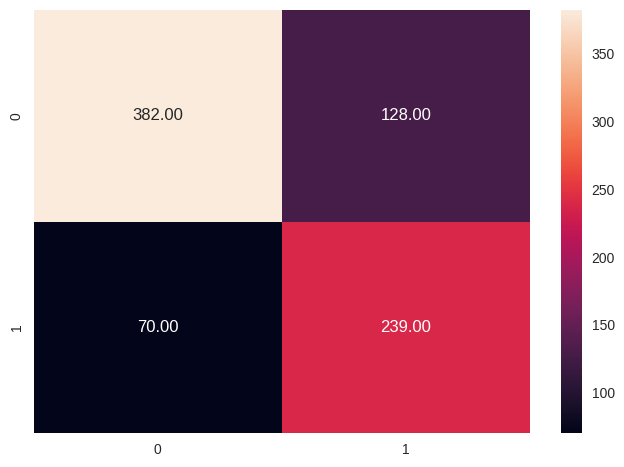

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
model = GradientBoostingClassifier(n_estimators=600)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

Gradient Boosting AUC score: 0.7612411955073292


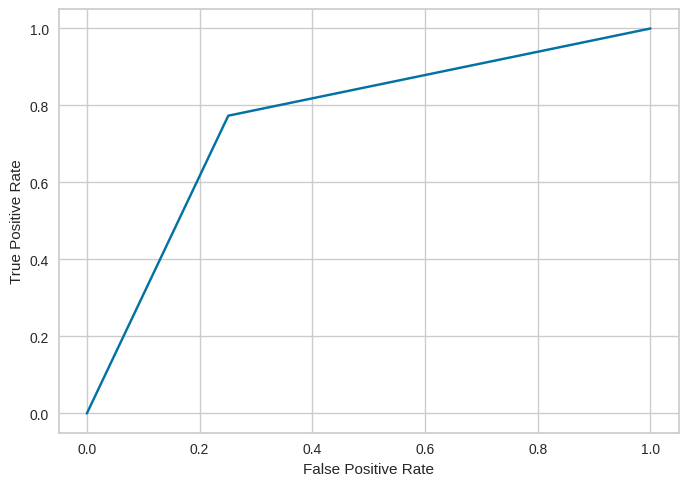

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(y_test, pred)
print(f'Gradient Boosting AUC score: {roc_auc_score(y_test, pred)}')


In [ ]:
from sklearn.metrics import average_precision_score

/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.84      0.75      0.79       510
           1       0.65      0.76      0.70       309

    accuracy                           0.76       819
   macro avg       0.74      0.76      0.75       819
weighted avg       0.77      0.76      0.76       819

Random Forest AUC score: 0.7567294879116695


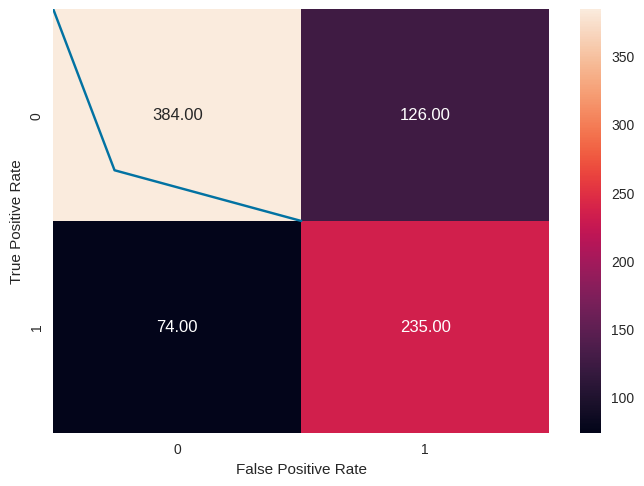

In [35]:
model2 = RandomForestClassifier (n_estimators = 100,
               max_features = 'sqrt',
               max_depth= 9,
               min_samples_leaf=1,
               min_samples_split=2,
               bootstrap = 120
               )

model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)
print(classification_report(y_test, pred2))
sns.heatmap(confusion_matrix(y_test, pred2), annot=True, fmt='.2f')

Random Forest AUC score: 0.7567294879116695


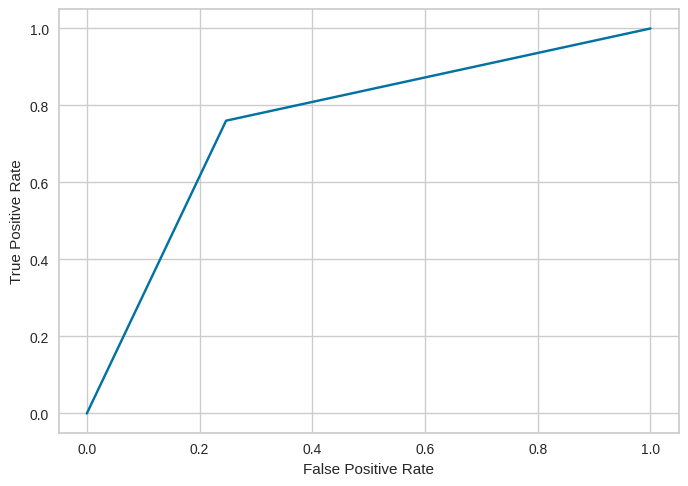

In [36]:
plot_roc_curve(y_test, pred2)
print(f'Random Forest AUC score: {roc_auc_score(y_test, pred2)}')

### Saving model

In [37]:
import pickle
# Saving model to disk
pickle.dump(model, open('model.pkl','wb'))

In [38]:
# Loading model to compare the results
model1 = pickle.load(open('model.pkl','rb'))
print(model1.predict([[8.3,214, 22018, 8.05, 356.8,363.2,18.4,100.3,4.5]]))

[0]
